# **Mushroom Predictions with 4 Classification Models**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/IML/mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,w,t,l,f,c,n,k,e,c,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,n,t,a,f,c,b,k,e,e,s,s,w,w,p,w,o,p,n,n,g
2,p,b,s,y,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,n,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,c,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
print('Total number of rows are:', df.shape[0])
print('Total number of columns are:', df.shape[1])

Total number of rows are: 8124
Total number of columns are: 23


In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,10,9,1,4,3,5,9,6,7
top,p,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4125,3656,3244,2284,4748,3528,7914,6796,5612,1728,4608,3778,5138,4936,4316,4384,8124,7924,7488,3912,2388,4040,3148


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

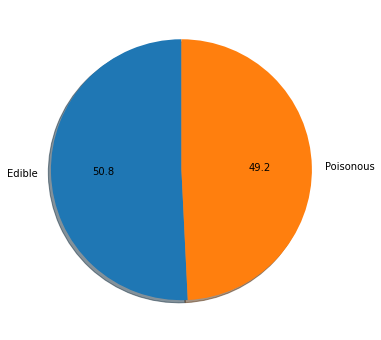

In [ ]:
plt.figure(figsize = (6,6))
plt.pie(df['class'].value_counts(), startangle = 90, autopct = '%.1f', labels = ['Edible', 'Poisonous'], shadow = True)
plt.show()

In [ ]:
X = df.drop(['class',],axis=1)
y = df['class']
print(X)
print(y)

     cap-shape cap-surface cap-color  ... spore-print-color population habitat
0            x           s         w  ...                 k          s       u
1            x           s         n  ...                 n          n       g
2            b           s         y  ...                 n          n       m
3            x           y         n  ...                 k          s       u
4            x           s         g  ...                 n          a       g
...        ...         ...       ...  ...               ...        ...     ...
8119         k           s         n  ...                 b          c       l
8120         x           s         n  ...                 b          v       l
8121         f           s         n  ...                 b          c       l
8122         k           y         n  ...                 w          v       l
8123         x           s         n  ...                 o          c       l

[8124 rows x 22 columns]
0       p
1       e
2     

In [ ]:
df.notnull().all()

class                       True
cap-shape                   True
cap-surface                 True
cap-color                   True
bruises                     True
odor                        True
gill-attachment             True
gill-spacing                True
gill-size                   True
gill-color                  True
stalk-shape                 True
stalk-root                  True
stalk-surface-above-ring    True
stalk-surface-below-ring    True
stalk-color-above-ring      True
stalk-color-below-ring      True
veil-type                   True
veil-color                  True
ring-number                 True
ring-type                   True
spore-print-color           True
population                  True
habitat                     True
dtype: bool

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = df.drop(['class'],axis=1).apply(le.fit_transform).values
print(X)

[[5 2 8 ... 2 3 5]
 [5 2 4 ... 3 2 1]
 [0 2 9 ... 3 2 3]
 ...
 [2 2 4 ... 0 1 2]
 [3 3 4 ... 7 4 2]
 [5 2 4 ... 4 1 2]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = np.array(le.fit_transform(y))
y.reshape(len(y), 1)

array([[1],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
accuracies = dict()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = lr.predict(X_test)
print(y_pred)

[1 0 1 ... 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score
accuracies['Logistic Regression'] = accuracy_score(y_test, y_pred)
print('Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

Accuracy is: 0.918785890073831


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1120   96]
 [ 102 1120]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1216
           1       0.92      0.92      0.92      1222

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


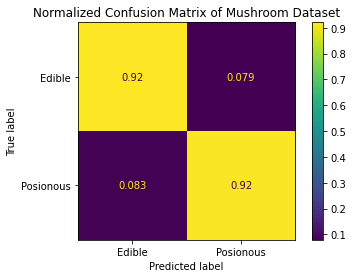

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, X_test, y_test,display_labels=['Edible', 'Posionous'],cmap= plt.cm.viridis, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#Make Prediction
y_pred = classifier.predict(X_test)
print(y_pred)

[1 0 0 ... 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score

accuracies['K-Nearest Neighbors'] = accuracy_score(y_test, y_pred)
print('ACCURACY : ' + str(accuracy_score(y_test, y_pred)))

ACCURACY : 0.9712879409351928


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1200   16]
 [  54 1168]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1216
           1       0.99      0.96      0.97      1222

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


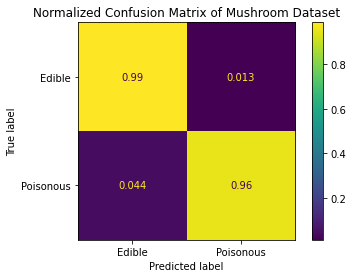

In [ ]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels= ['Edible', 'Poisonous'], cmap = plt.cm.viridis, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

# Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state= 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)

[1 0 1 ... 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score

accuracies['Decision Tree Classification'] = accuracy_score(y_test, y_pred)
print('ACCURACY: ' + str(accuracy_score(y_test, y_pred)))

ACCURACY: 0.9528301886792453


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1143   73]
 [  42 1180]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1216
           1       0.94      0.97      0.95      1222

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


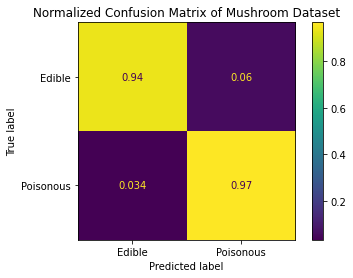

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test, display_labels= ['Edible', 'Poisonous'], cmap = plt.cm.viridis, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

# Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators= 2, random_state= 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)

[1 0 0 ... 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score

accuracies['Random Forest Classification'] = accuracy_score(y_test, y_pred)
print('Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

Accuracy is: 0.9737489745693191


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1206   10]
 [  54 1168]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1216
           1       0.99      0.96      0.97      1222

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


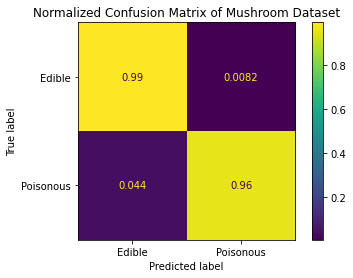

In [ ]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels= ['Edible', 'Poisonous'], cmap = plt.cm.viridis, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

# Result

In [ ]:
accuracy_df  = pd.DataFrame(list(accuracies.items()),columns = ['Model Name', 'Accuracy']) 
accuracy_df

,Model Name,Accuracy
0,Logistic Regression,0.918786
1,K-Nearest Neighbors,0.971288
2,Decision Tree Classification,0.952830
3,Random Forest Classification,0.973749


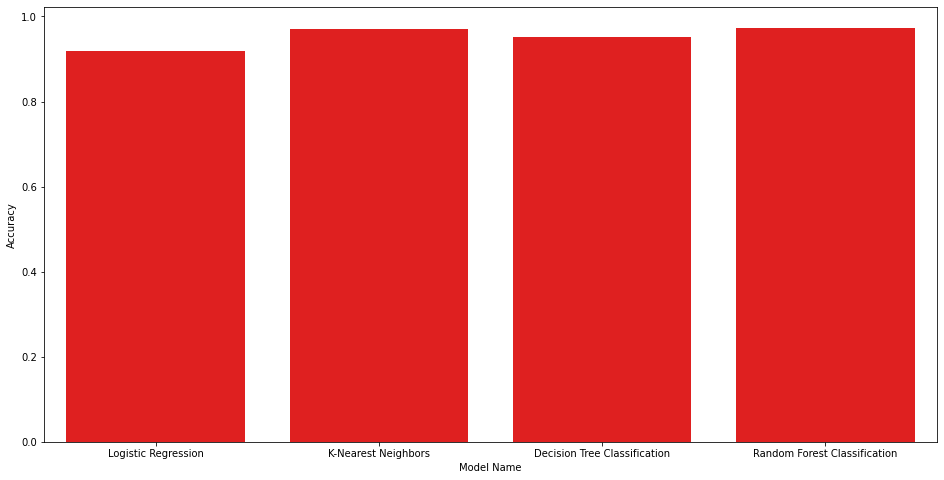

In [ ]:
f, ax = plt.subplots(figsize=(16, 8))
sns.set_color_codes("pastel")
sns.barplot(y="Accuracy", x="Model Name", data = accuracy_df, color="red")
plt.show()